In [70]:
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import glob

In [71]:
dirpath = 'H:\\ZiYuanPingGu\\AMSR_nc\\2020*.nc'
dirlist = glob.glob(dirpath)

In [72]:
dirlist

['H:\\ZiYuanPingGu\\AMSR_nc\\20200101_0000.nc',
 'H:\\ZiYuanPingGu\\AMSR_nc\\20200101_0010.nc',
 'H:\\ZiYuanPingGu\\AMSR_nc\\20200101_0020.nc',
 'H:\\ZiYuanPingGu\\AMSR_nc\\20200101_0030.nc',
 'H:\\ZiYuanPingGu\\AMSR_nc\\20200101_0140.nc',
 'H:\\ZiYuanPingGu\\AMSR_nc\\20200101_0150.nc',
 'H:\\ZiYuanPingGu\\AMSR_nc\\20200101_0200.nc',
 'H:\\ZiYuanPingGu\\AMSR_nc\\20200101_0210.nc',
 'H:\\ZiYuanPingGu\\AMSR_nc\\20200101_0320.nc',
 'H:\\ZiYuanPingGu\\AMSR_nc\\20200101_0330.nc',
 'H:\\ZiYuanPingGu\\AMSR_nc\\20200101_0340.nc',
 'H:\\ZiYuanPingGu\\AMSR_nc\\20200101_0350.nc',
 'H:\\ZiYuanPingGu\\AMSR_nc\\20200101_0500.nc',
 'H:\\ZiYuanPingGu\\AMSR_nc\\20200101_0510.nc',
 'H:\\ZiYuanPingGu\\AMSR_nc\\20200101_0520.nc',
 'H:\\ZiYuanPingGu\\AMSR_nc\\20200101_0530.nc',
 'H:\\ZiYuanPingGu\\AMSR_nc\\20200101_0640.nc',
 'H:\\ZiYuanPingGu\\AMSR_nc\\20200101_0650.nc',
 'H:\\ZiYuanPingGu\\AMSR_nc\\20200101_0700.nc',
 'H:\\ZiYuanPingGu\\AMSR_nc\\20200101_0820.nc',
 'H:\\ZiYuanPingGu\\AMSR_nc\\20200101_08

In [73]:
# LWP_pointX = np.empty([])
# LWP_pointY = np.empty([])
for i in range(len(dirlist)):
    ncdata = xr.open_dataset(dirlist[i])
    if i == 0:
        LWP_pointX = ncdata.H8data.data
        LWP_pointY = ncdata.AMSRdata.data
    else:
        LWP_pointX = np.hstack([LWP_pointX, ncdata.H8data.data])
        LWP_pointY = np.hstack([LWP_pointY, ncdata.AMSRdata.data])

In [74]:
LWP_pointX.shape, LWP_pointY.shape

((196361,), (196361,))

In [75]:
index = ~np.isnan(LWP_pointX)
np.sum(index)

150891

In [76]:
LWP_pointY[LWP_pointY > 0].shape

(195860,)

In [77]:
from scipy import stats
r = stats.pearsonr(LWP_pointX[index], LWP_pointY[index])
#RMSE
bias = LWP_pointX[index]-LWP_pointY[index]
rmse = np.sqrt(sum(bias**2)/len(LWP_pointX[index]))
#MAE
mae = sum(np.abs(bias))/len(LWP_pointX[index])

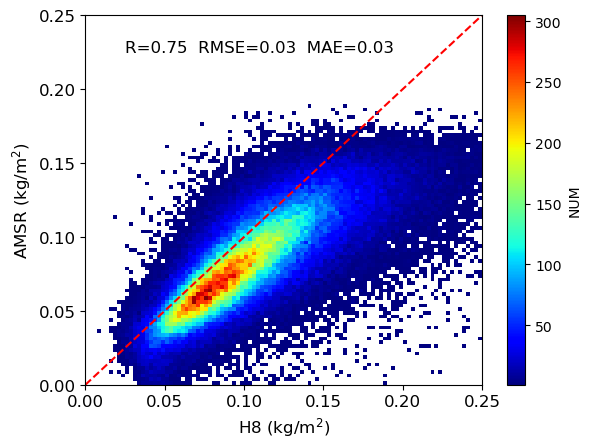

In [82]:
from matplotlib.colors import LogNorm
 
from pylab import *
 
#normal distribution center at x=0 and y=5
# x = randn(100000)
# y = randn(100000)+5
# range=[[0,0.15],[0,0.15]]
# fig = plt.figure(figsize=(4,4), dpi=300)
# ax = fig.add_subplot(111)
hist2d(LWP_pointX[index], LWP_pointY[index], range=[[0,0.25],[0,0.25]], bins=100, cmap='jet', cmin=1)
xyx = xyy = np.linspace(0, 0.25, 5)
plot(xyx, xyy, 'r--')
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
xlabel('H8 (kg/m$^2$)', fontsize=12)
ylabel('AMSR (kg/m$^2$)', fontsize=12)
# title('(a)', loc='left', fontsize=15)
text(0.025, 0.225, 'R={}  RMSE={}  MAE={}'.format(round(r[0],2), round(rmse,2), round(mae,2)), fontsize=12)
colorbar(label='NUM')
plt.savefig(r"C:\Users\YUJIE\Desktop\GRL图片\allmonths_hist.jpg", bbox_inches='tight', pad_inches=0.1, dpi=300)

In [ ]:
from scipy import stats
r = stats.pearsonr(LWP_pointX[index], LWP_pointY[index])
#RMSE
bias = LWP_pointX[index]-LWP_pointY[index]
rmse = np.sqrt(sum(bias**2)/len(LWP_pointX[index]))
#MAE
mae = sum(np.abs(bias))/len(LWP_pointX[index])

In [ ]:
r

(0.7397455560529198, 0.0)

In [ ]:
#RMSE
bias = LWP_pointX[index]-LWP_pointY[index]
rmse = np.sqrt(sum(bias**2)/len(LWP_pointX[index]))
rmse

0.03220987095012021

In [ ]:
#MAE
sum(np.abs(bias))/len(LWP_pointX[index])

0.023160554450848678